## Connect Drive và lấy file

In [1]:
import os
import shutil

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset_drive_path = '/content/drive/MyDrive/Smart-Agriculture-System/'

In [4]:
name = 'data.csv'
drive_path = dataset_drive_path + name
print(drive_path)

if os.path.exists(drive_path):
  shutil.copy(drive_path, './')

/content/drive/MyDrive/Smart-Agriculture-System/data.csv


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [6]:
df = pd.read_csv(name)

In [7]:
df['addedAt'] = pd.to_datetime(df['addedAt'])
df = df.sort_values(by='addedAt')

In [8]:
def compute_time_to_water(df, threshold=3000):
    time_to_water = []
    for i in range(len(df)):
        future = df.iloc[i:][df.iloc[i:]['soilMoisture'] >= threshold]
        if not future.empty:
            time_diff = (future.iloc[0]['addedAt'] - df.iloc[i]['addedAt']).total_seconds() / 60
        else:
            time_diff = np.nan
        time_to_water.append(time_diff)
    return time_to_water

In [9]:
df['time_to_water'] = compute_time_to_water(df)
df.dropna(inplace=True)

## Chọn các đặc trưng để huấn luyện

In [10]:
features = ['humidity', 'temperature', 'light', 'soilMoisture', 'rainVolume', 'gasVolume']
X = df[features]
y = df['time_to_water']

## Chuẩn hóa dữ liệu

In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Train model

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [13]:
y_pred = model.predict(X_test)

In [14]:
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.2f} phút")

Mean Absolute Error: 15.50 phút


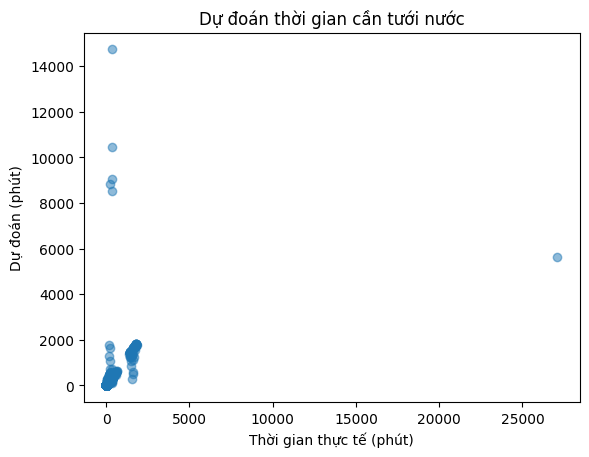

In [15]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Thời gian thực tế (phút)")
plt.ylabel("Dự đoán (phút)")
plt.title("Dự đoán thời gian cần tưới nước")
plt.show()

In [16]:
# df[['addedAt', 'soilMoisture', 'time_to_water']].to_csv("output.csv", index=False)

In [17]:
new_sample = {
    "humidity": [75],
    "temperature": [25.0],
    "light": [1990.15],
    "soilMoisture": [2590.2],
    "rainVolume": [3977.576096],
    "gasVolume": [163.0]
}

new_data = pd.DataFrame(new_sample)

new_data_scaled = scaler.transform(new_data)

predicted_time = model.predict(new_data_scaled)[0]
print(f"Dự đoán thời gian còn lại trước khi cần tưới: {predicted_time:.2f} phút")

Dự đoán thời gian còn lại trước khi cần tưới: 548.82 phút


## Lưu model

In [18]:
import pickle

In [19]:
with open("WateringTimePredictor.pkl", "wb") as f:
    pickle.dump(model, f)

In [20]:
with open("scaler_watering_time_predictor.pkl", "wb") as f:
    pickle.dump(scaler, f)

In [21]:
df

,_id,humidity,temperature,light,soilMoisture,rainVolume,gasVolume,fieldId,createdAt,updatedAt,__v,addedAt,time_to_water
0,676d883c60a666999f426d6c,74.43,29.44,1771.95,2000.000000,4095.000000,188.0,676d4559c3b9d9d8e1ac5828,2024-12-26 16:45:48.539000+00:00,2025-01-07T10:04:48.522Z,0,2024-12-26 23:45:48.539000+00:00,633.137433
1,676d887960a666999f426d6e,74.80,29.59,1721.00,2002.909722,4095.000000,168.0,676d4559c3b9d9d8e1ac5828,2024-12-26 16:46:49.714000+00:00,2025-01-07T10:04:48.522Z,0,2024-12-26 23:46:49.714000+00:00,632.117850
2,676d88b660a666999f426d70,74.00,30.42,1990.15,2005.819444,4095.000000,167.0,676d4559c3b9d9d8e1ac5828,2024-12-26 16:47:50.741000+00:00,2025-01-07T10:04:48.522Z,0,2024-12-26 23:47:50.741000+00:00,631.100733
3,676d88f360a666999f426d72,74.00,30.44,1870.03,2008.729167,3977.576096,166.0,676d4559c3b9d9d8e1ac5828,2024-12-26 16:48:51.876000+00:00,2025-01-07T10:04:48.522Z,0,2024-12-26 23:48:51.876000+00:00,630.081817
4,676d893060a666999f426d74,73.97,30.46,1889.67,2011.638889,4075.465112,163.0,676d4559c3b9d9d8e1ac5828,2024-12-26 16:49:52.998000+00:00,2025-01-07T10:04:48.522Z,0,2024-12-26 23:49:52.998000+00:00,629.063117
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32794,67a953ed37f4819d7e08f689,67.00,26.49,254.88,3961.152778,536.160687,869.0,676d4559c3b9d9d8e1ac5828,2025-02-10 01:18:37.392000+00:00,2025-02-10T01:18:37.392Z,0,2025-02-10 08:18:37.391000+00:00,0.000000
32795,67a9542537f4819d7e08f68b,67.00,26.48,253.63,3964.062500,469.273495,869.0,676d4559c3b9d9d8e1ac5828,2025-02-10 01:19:33.688000+00:00,2025-02-10T01:19:33.688Z,0,2025-02-10 08:19:33.687000+00:00,0.000000
32796,67a9546137f4819d7e08f68d,67.00,26.41,253.02,3966.972222,593.073282,869.0,676d4559c3b9d9d8e1ac5828,2025-02-10 01:20:33.895000+00:00,2025-02-10T01:20:33.895Z,0,2025-02-10 08:20:33.894000+00:00,0.000000
32797,67a9549e37f4819d7e08f68f,66.93,26.41,251.12,3969.881944,570.131628,868.0,676d4559c3b9d9d8e1ac5828,2025-02-10 01:21:34.325000+00:00,2025-02-10T01:21:34.325Z,0,2025-02-10 08:21:34.325000+00:00,0.000000
